# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. As a data scientist at ExtraaLearn, the objectives are to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, tree
from sklearn.metrics import recall_score
import warnings
from matplotlib.ticker import MaxNLocator
from sklearn.tree import DecisionTreeClassifier
from matplotlib.ticker import MultipleLocator
warnings.filterwarnings("ignore")


In [36]:
df = pd.read_csv('ExtraaLearn.csv')
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


## Data Overview

- Observations
- Sanity checks

#### Observations

In [2]:
# Check the shape of the data
print("Number of Rows and Columns: ", df.shape)

# Check the data types of each column
print("\nData Types:\n", df.dtypes)

Number of Rows and Columns:  (4612, 15)

Data Types:
 ID                        object
age                        int64
current_occupation        object
first_interaction         object
profile_completed         object
website_visits             int64
time_spent_on_website      int64
page_views_per_visit     float64
last_activity             object
print_media_type1         object
print_media_type2         object
digital_media             object
educational_channels      object
referral                  object
status                     int64
dtype: object


- object: This data type typically means the column contains string (text) values. In your dataset, the columns 'ID', 'current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', and 'referral' are all of this type. This suggests that these columns contain categorical or textual data.

- int64: This is a numerical (integer) data type. 'age', 'website_visits', 'time_spent_on_website', and 'status' columns are of this type, meaning they contain integer values. For example, 'age' would represent the age of the lead, 'website_visits' could be the number of times a lead visited the website, and 'status' could be a binary value (0 or 1) indicating whether the lead was converted to a paid customer or not.

- float64: This is also a numerical data type but can contain decimal values. 'page_views_per_visit' column is of this type, which could mean it represents the average number of pages viewed during the visits, a value that could reasonably be expected to be a decimal.

#### Sanity Checks

In [7]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64


There are no missing values in the dataset

In [5]:
print("\nNumber of unique IDs: ", df['ID'].nunique())
len(df.ID)


Number of unique IDs:  4612


4612

The total number of ID is 4612 IDs and all of them are unique, i.e none of them are repeated and only occur once.

### Statistical summary of the DataFrame (Numerical Variables)

In [8]:
# provides a statistical summary of the DataFrame
df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


### Observations
Based on these statistics, we can see that:

- age:
The ages of the leads range from 18 to 63 years, with an average age of approximately 46.2 years.
The standard deviation of 13.16 suggests there's a moderate amount of variability in the ages of the leads.
The 25%, 50% (median), and 75% quantiles tell us that 25% of leads are 36 or younger, 50% are 51 or younger, and 75% are 57 or younger.

- website_visits:
The number of times a lead has visited the website ranges from 0 to 30 times, with an average of approximately 3.57 times.
The standard deviation of 2.83 indicates a moderate variability in website visits.
The quantiles show that 25% of leads have visited the website 2 times or less, 50% have visited 3 times or less, and 75% have visited 5 times or less.

- time_spent_on_website:
The total time a lead has spent on the website ranges from 0 to 2537 (assuming the unit is minutes), with an average of approximately 724 minutes.
The high standard deviation of 743.83 suggests a high variability in the time spent on the website by the leads.
The quantiles suggest that 25% of leads have spent 148.75 minutes or less on the website, 50% have spent 376 minutes or less, and 75% have spent 1336.75 minutes or less.

- page_views_per_visit:
The average number of pages viewed per visit ranges from 0 to approximately 18.43, with an average of approximately 3.03.
The standard deviation of 1.97 indicates a moderate variability in the number of page views per visit.
The quantiles show that 25% of leads view about 2.08 pages or less per visit, 50% view about 2.79 pages or less, and 75% view about 3.76 pages or less.

- status:
The status (presumably indicating whether a lead was converted) is a binary variable, ranging from 0 to 1. The mean of approximately 0.299 suggests that about 29.9% of leads are converted.
The standard deviation of 0.458 is typical for a binary variable and indicates a balance between the two possible outcomes (not converted and converted)

### Statistical Summary (Categorical Variables)

In [18]:
df.select_dtypes(include=['object']).describe()


,ID,current_occupation,first_interaction,profile_completed,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral
count,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612
unique,4612,3,2,3,3,2,2,2,2,2
top,EXT001,Professional,Website,High,Email Activity,No,No,No,No,No
freq,1,2616,2542,2264,2278,4115,4379,4085,3907,4519


#### OBSERVATIONS
This is a statistical summary of the categorical columns in the DataFrame. For each of these columns we can see that:

- **ID:**
This column has 4612 unique entries, each with a frequency of 1. This confirms that each ID is unique.

- **current_occupation:**
There are 3 unique categories in this column, with 'Professional' being the most common, occurring 2616 times.

- **first_interaction:**
There are 2 unique categories in this column. 'Website' is the most common first interaction, occurring 2542 times.

- **profile_completed:**
There are 3 unique categories in this column. 'High' is the most common, which means a majority of the leads have completed their profile to a high extent.

- **last_activity:**
There are 3 unique categories for the last activity. The most common last activity is 'Email Activity', with a frequency of 2278.
- **print_media_type1, print_media_type2, digital_media, educational_channels, referral:**
For each of these columns, there are 2 unique categories ('Yes' and 'No'). The most common value for all these columns is 'No'. This suggests that the majority of leads have not seen the ad of ExtraaLearn in print media type 1 and 2, digital media, and educational channels, and were not referred.

### Chi Square Dependency Test (Categorical Columns)

In [23]:
import scipy.stats as stats

# List of categorical columns
categorical_cols = ['current_occupation', 'first_interaction', 'profile_completed', 
                    'last_activity', 'print_media_type1', 'print_media_type2', 
                    'digital_media', 'educational_channels', 'referral']

for col in categorical_cols:
    contingency_table = pd.crosstab(df['status'], df[col])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test for variable: {col}")
    print(f"Chi-square statistic: {chi2}")
    print(f"p-value: {p}")
    print("\n")


Chi-square test for variable: current_occupation
Chi-square statistic: 134.5990409921104
p-value: 5.9181996754348085e-30


Chi-square test for variable: first_interaction
Chi-square statistic: 668.0813826411269
p-value: 2.611251831709229e-147


Chi-square test for variable: profile_completed
Chi-square statistic: 308.4293372457932
p-value: 1.0602795584134175e-67


Chi-square test for variable: last_activity
Chi-square statistic: 82.08794773478009
p-value: 1.4956453807549296e-18


Chi-square test for variable: print_media_type1
Chi-square statistic: 1.1008839901872776
p-value: 0.29407218724956063


Chi-square test for variable: print_media_type2
Chi-square statistic: 0.525324360834757
p-value: 0.4685792559805736


Chi-square test for variable: digital_media
Chi-square statistic: 1.0547396207127493
p-value: 0.30441802930314277


Chi-square test for variable: educational_channels
Chi-square statistic: 1.3493346486292057
p-value: 0.24539446810342214


Chi-square test for variable: referral

#### OBSERVATIONS
The chi-square test is used to determine whether there is a significant association between two categorical variables. The null hypothesis states that the variables are independent, while the alternative hypothesis states that the variables are dependent.

Let's look at the results:

- **current_occupation:** The p-value is practically 0, which is less than 0.05, indicating that we can reject the null hypothesis. This suggests that there is a significant association between the current occupation of a lead and their conversion status.

- **first_interaction:** Similarly, the p-value is almost 0. This means that the first interaction channel is significantly associated with the lead conversion status.

- **profile_completed:** Again, the p-value is practically 0. This indicates that the degree to which a profile is completed significantly affects the lead conversion status.

- **last_activity:** The p-value is also practically 0, indicating that the last activity performed by a lead is significantly associated with the conversion status.

- **print_media_type1:** The p-value is 0.294, which is greater than 0.05. This suggests that seeing the ad of ExtraaLearn in the Newspaper does not significantly affect the conversion status.

- **print_media_type2:** The p-value is 0.468, greater than 0.05, suggesting that seeing the ad of ExtraaLearn in Magazines does not significantly affect the conversion status.

- **digital_media:** The p-value is 0.304, which is greater than 0.05, indicating that seeing the ad of ExtraaLearn on digital platforms does not significantly affect the conversion status.

- **educational_channels:** The p-value is 0.245, which is greater than 0.05, indicating that hearing about ExtraaLearn in educational channels does not significantly affect the conversion status.

- **referral:** The p-value is practically 0, indicating that hearing about ExtraaLearn through a referral significantly affects the conversion status.

These results suggest that 'current_occupation', 'first_interaction', 'profile_completed', 'last_activity', and 'referral' are the factors that have significant impact on the lead conversion process. The other variables - 'print_media_type1', 'print_media_type2', 'digital_media', and 'educational_channels' - do not appear to significantly impact lead conversion.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Univariate Analysis on Numerical Variables

In [7]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns
print(num_col)


Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'status'],
      dtype='object')


In [30]:
def histogram_boxplot(feature, figsize=(15, 10), bins=3):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red', showfliers=True)
       
    # For histogram
    sns.histplot(x=feature, kde=True, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    tick_interval = 1  # You can change this value to set the desired interval between ticks
#     ax_box.xaxis.set_major_locator(MultipleLocator(tick_interval))
#     ax_hist.xaxis.set_major_locator(MultipleLocator(tick_interval))
#     Set the tick parameters
    ax_hist.tick_params(axis='x', which='major', labelsize=8)
    ax_hist.xaxis.set_major_locator(MaxNLocator(nbins=10))

    

    plt.show()

### Observations on age

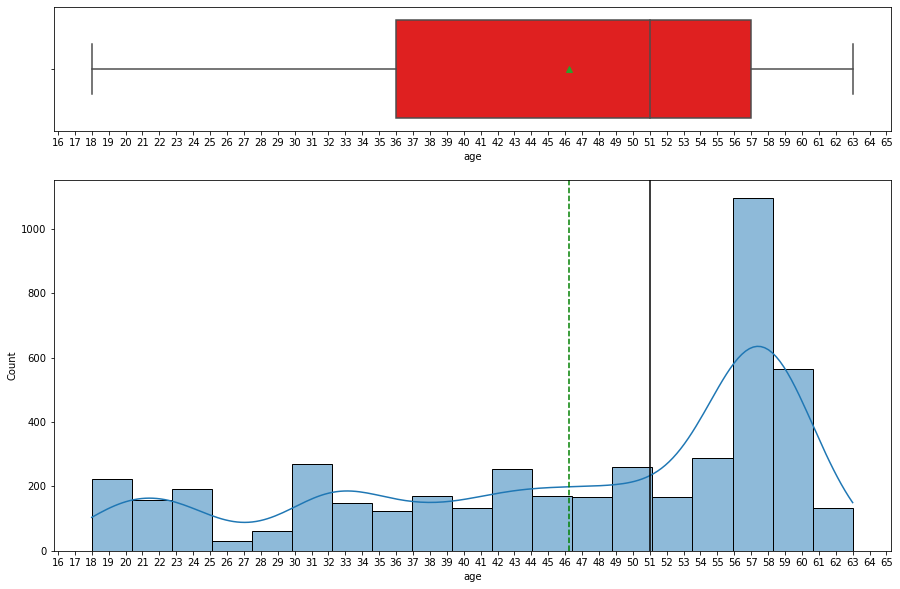

In [151]:
histogram_boxplot(df['age'])

In [143]:
len(df[df.age==57])

385

#### OBSERVATIONS
The observation provides a detailed interpretation of the box plot for the 'ages' column. Here's a breakdown of the information:
- Whiskers: The upper and lower whiskers in the box plot represent the range of scores outside the middle 50% of the data.

- Lower Whisker: The lower whisker extends from the bottom edge of the box down to the minimum value of 18 years. This indicates that the lowest 25% of ages, beyond the lower quartile, are considered as outliers or extreme values and there are no outliers.

- Upper Whisker: The upper whisker extends from the top edge of the box up to the maximum value of 63 years. This shows that the highest 25% of ages, beyond the upper quartile, are also considered outliers or extreme values and there are no outliers.

- Range: The range of ages spans from the minimum value of 18 years to the maximum value of 63 years. This indicates the full extent of the age distribution within the dataset.

- Lower Quartile (Q1): The lower quartile, marked by the bottom edge of the box, is positioned at approximately 36 years. This means that 25% of the ages in the dataset fall below this value.

- Median (Q2): The median, represented by the line within the box, is located at 51 years. This is the midpoint of the data, with 50% of the ages being greater than or equal to this value, and 50% being less than or equal to it.

- Upper Quartile (Q3): The upper quartile, indicated by the top edge of the box, is situated at around 57 years. This means that 75% of the ages fall below this value.

The histogram plot provided displays a left-skewed distribution, which is also referred to as a negatively skewed histogram. The following are observed:
- The peak of the histogram, representing the highest frequency of values, is located on the right side of the center.
- The mean age is approximately 46.1, the median age is 51, and the mode is 57.
- In a left-skewed distribution, the mean is less than the median, which is less than the mode.
- The histogram highlights the concentration of ages towards the younger end, with the tail extending towards older ages.

### Observations on website_visits

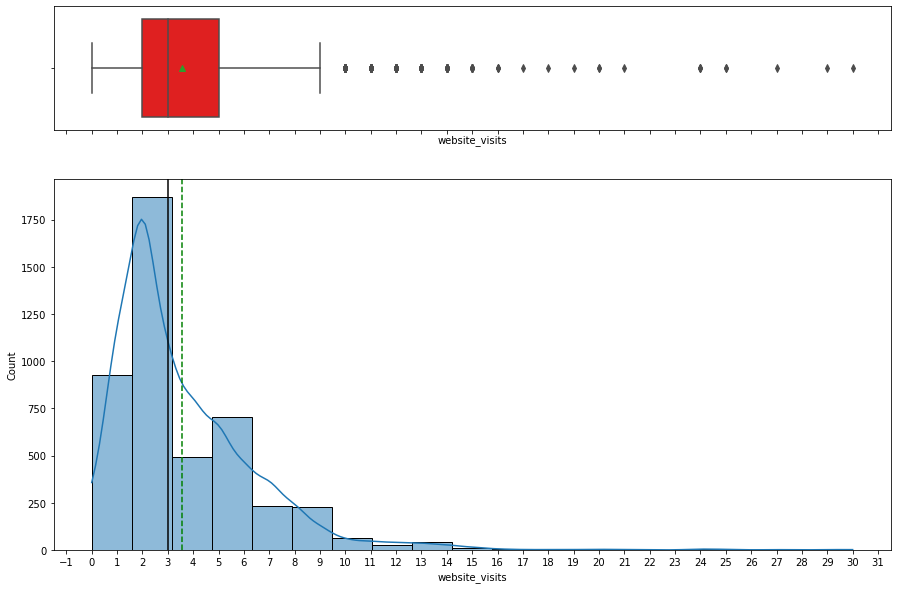

In [180]:
histogram_boxplot(df['website_visits'])

#### OBSERVATIONS
The observation provides a detailed interpretation of the box plot for the 'website_visits' column. Here's a breakdown of the information:
- Whiskers: The upper and lower whiskers in the box plot represent the range of times visited outside the middle 50% of the data.

- Lower Whisker: The lower whisker extends from the bottom edge of the box down to the minimum value of 0 times. This indicates that the lowest 25% of website visits, beyond the lower quartile, are considered as outliers or extreme values.

- Upper Whisker: The upper whisker extends from the top edge of the box up to the maximum value of 9 times. This shows that the highest 25% of website visits, beyond the upper quartile, are also considered outliers or extreme values.

- Range: The range of website visits spans from the minimum value of 0 to the maximum value of 9 times. This indicates the full extent of the website visit distribution within the dataset.

- Lower Quartile (Q1): The lower quartile, marked by the bottom edge of the box, is positioned at approximately 2 times. This means that 25% of the website visits in the dataset fall below this value.

- Median (Q2): The median, represented by the line within the box, is located at 3 times for website visits. This is the midpoint of the data, with 50% of the website visits being greater than or equal to this value, and 50% being less than or equal to it.

- Upper Quartile (Q3): The upper quartile, indicated by the top edge of the box, is situated at around 9 times as the number of website visits. This means that 75% of the website visits fall below this value.



- The histogram plot reveals a right-skewed distribution, also known as a positively skewed histogram.
- The peak of the histogram, representing the highest frequency of values, is located on the left side of the center.
- The mean number of times the website is visited is approximately 3.5, indicating the average number of visits.
- The median value, representing the middle point of the data, is 3, indicating that 50% of the website visits are equal to or below this value.
- The mode value, which represents the most frequently occurring number of visits, is 2.
- In a right-skewed distribution, the mean is greater than the median, and the median is greater than the mode.
- The rightward tail of the histogram suggests the presence of a smaller number of high-frequency visits, while the majority of visits are concentrated towards the lower end.
- The histogram provides insights into the distribution of website visits, highlighting the concentration of visits towards the lower range and the presence of a few higher values on the right side of the distribution.


### Observations on number of time_spent_on_website

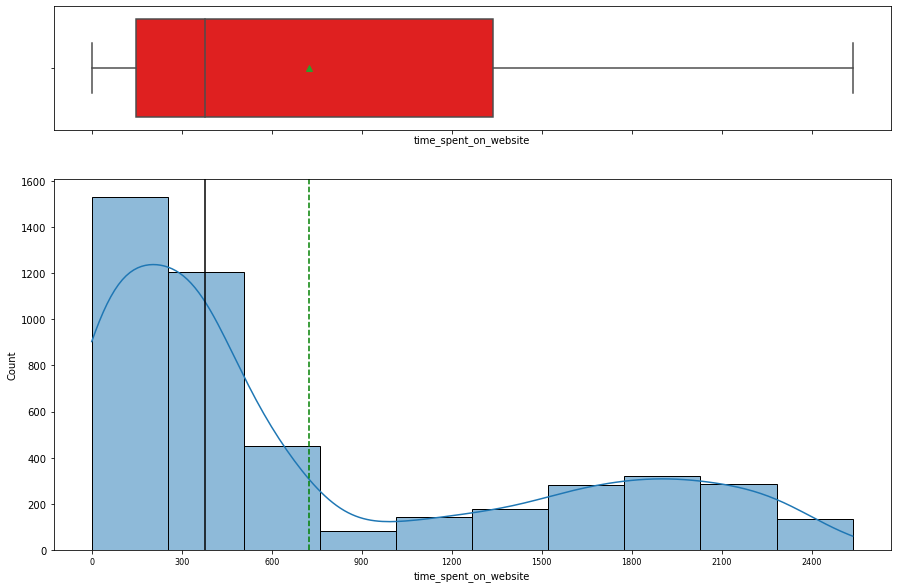

In [196]:
histogram_boxplot(df['time_spent_on_website'])

#### OBSERVATION
- The mean is greater than the median, being on the right side means it is a positively or right skewed data.
- The data ranges from 0 to 2530 number of time spent on the website, with majority time spent on website as 0 mins
- The quantiles suggest that 25% of leads have spent 148.75 minutes or less on the website, 50% have spent 376 minutes or less, and 75% have spent 1336.75 minutes or less.

In [186]:
len(df[df.time_spent_on_website == 0]),len(df[df.time_spent_on_website == 300])

(174, 10)

### Observations on number of page_views_per_visit

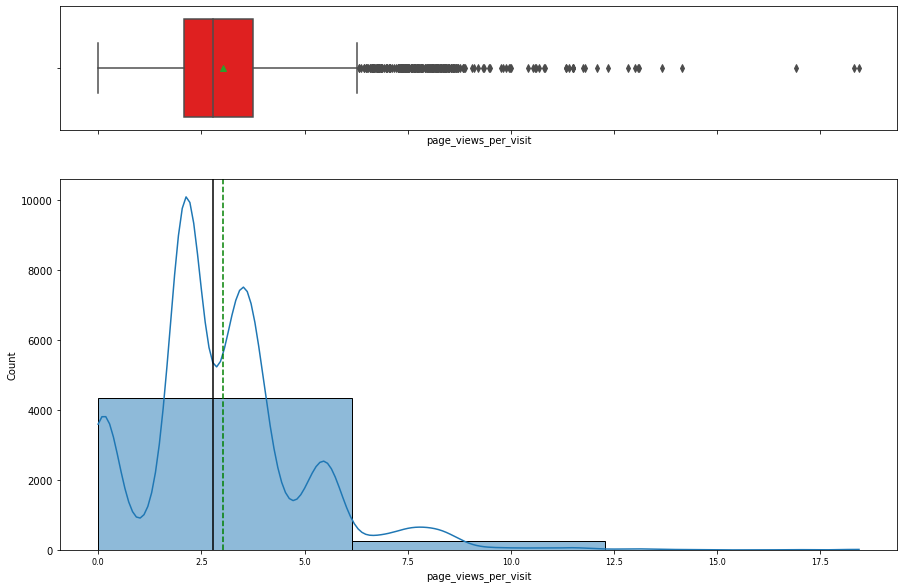

In [209]:
histogram_boxplot(df['page_views_per_visit'])

#### OBSERVATION
- The upper and lower whisker show a range of 0 to ~ 6.3 number of pages view per visit excluding outliers.
- The histogram and box plot having mean greater than the median show that it is right skewed positively
- The distribution of page views per visit in the given dataset is right skewed, with a longer tail on the right side of the distribution.
- The mean value of page views per visit is greater than the median value, indicating the influence of outliers on the mean.
- Outliers, which are extreme values, contribute to the skewness of the data distribution.
- The presence of outliers can skew the mean value, pulling it towards higher values.
- However, the median value, representing the middle value in the dataset, is less influenced by outliers and provides a robust measure of central tendency.
- The median value of 2.792 times per visit can be considered a more representative measure of the typical number of page views per visit.
- The right-skewed distribution, with the mean greater than the median, suggests a small number of visits with a high number of page views.
- The outliers in the distribution further emphasize the skewness, with the mean being more influenced by these extreme values compared to the median.





### Observations on Status

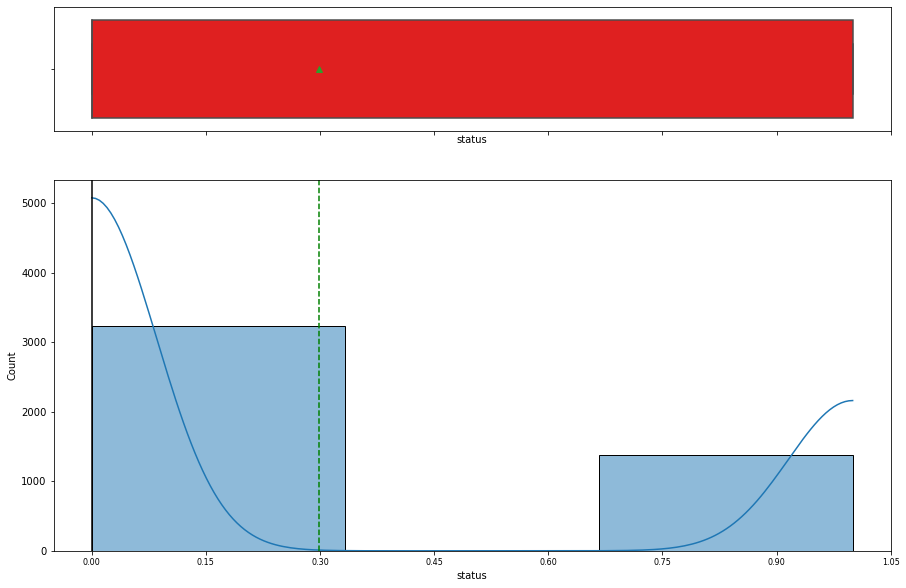

In [31]:
histogram_boxplot(df['status'])

#### OBSERVATION
- **Count:** The number of leads with status 0 is higher than the number of leads with status 1. This suggests that a larger proportion of leads in the dataset have status 0 compared to status 1.

- **Median:** The median value for the "status" column is 0. 

- **Mode:** The mode of the "status" column is also 0. The mode represents the most frequently occurring value in the dataset. In this case, the mode being 0 indicates that status 0 is the most common status among the leads.



### Univariate Analysis on Categorical Variables

In [33]:
# defining a function to plot bar plots
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))
    plt.xticks(rotation=45)
    
#     Convert the column to a categorical data type
    data[z] = data[z].astype('category')
    
    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
        
    plt.show()     

In [37]:
#Grouping categorical Variables
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('ID') if 'ID' in categorical_columns else categorical_columns

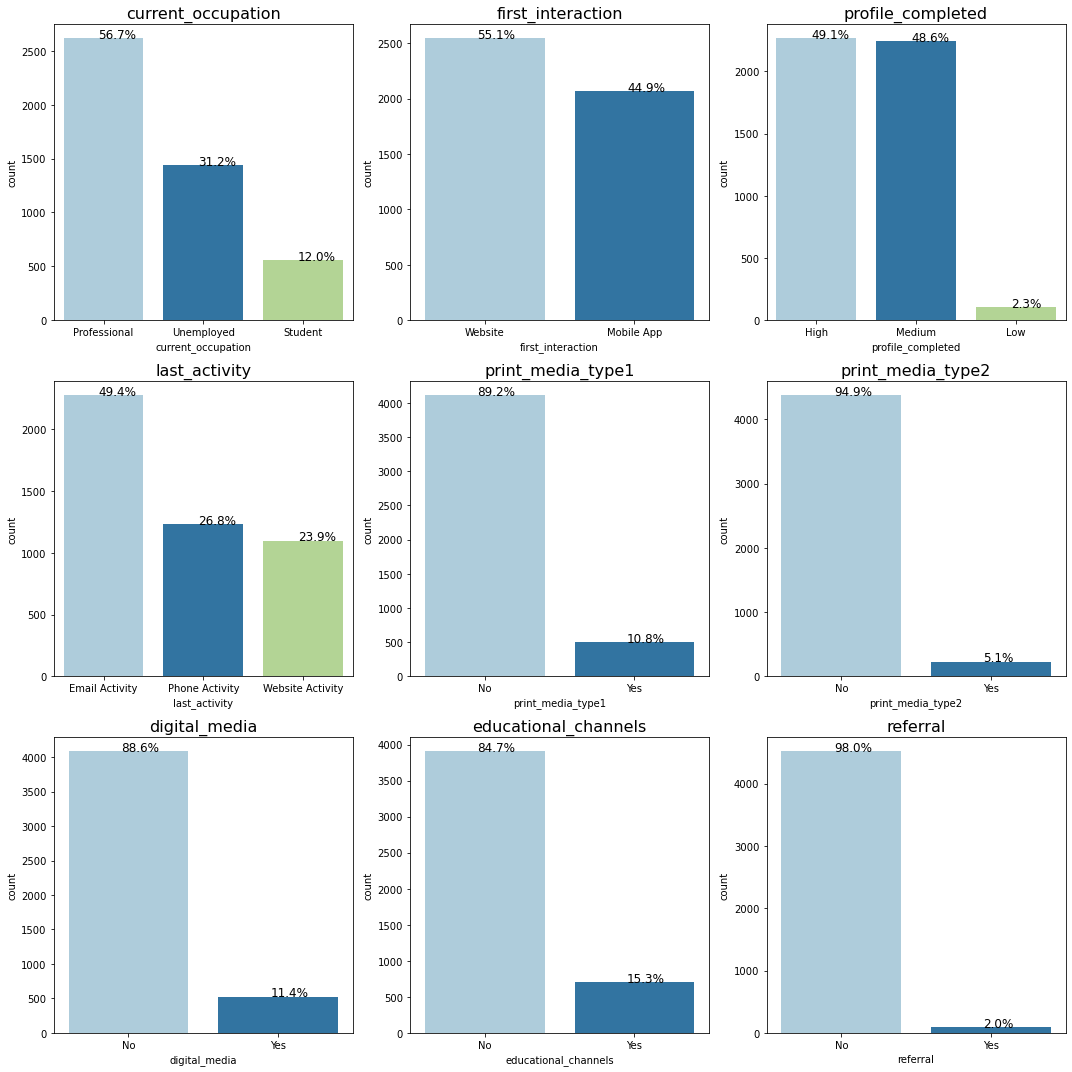

In [38]:
import math
n = len(categorical_columns)
cols = 3  # define the number of columns in the grid
rows = math.ceil(n/cols) # define the number of rows in the grid

fig, axs = plt.subplots(rows, cols, figsize=(15, 5*rows))

for idx, column in enumerate(categorical_columns):
    i = idx // cols
    j = idx % cols
    
    total = len(df[column])
    ax = sns.countplot(x=column, data=df, palette='Paired', order=df[column].value_counts().index, ax=axs[i,j])
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    
    axs[i,j].set_title(column, fontsize=16)

plt.tight_layout()
plt.show()


### Observations on the Categorical Columns:

- **Current Occupation:**
The majority of leads (56.7%) have a professional occupation.<br>
A significant portion of leads (31.2%) are unemployed.<br>
A smaller proportion of leads (12.0%) are students.<br>

- **First Interaction:**
Most leads (55.1%) first interacted with ExtraaLearn through the website.<br>
A smaller portion of leads (44.9%) first interacted through the mobile app.<br>

- **Profile Completed:**
Almost half of the leads (49.1%) have a high completion percentage of their profiles (75-100% filled).<br>
A similar proportion (48.6%) have a medium completion percentage (50-75% filled).<br>
A small percentage (2.3%) have a low completion percentage (0-50% filled).<br>

- **Last Activity:**
The most common type of activity is email activity (49.4%), indicating leads seeking information through email and receiving information from representatives.<br>
Phone activity is also significant (26.8%), involving phone conversations and SMS interactions with representatives.<br>
Website activity comprises a smaller portion (23.9%), including interactions on live chat and profile updates.<br>

- **Print Media Type 1:**
The majority of leads (89.2%) have not seen ExtraaLearn's ad in newspapers.<br>
A small percentage (10.8%) have seen the ad in newspapers.<br>

- **Print Media Type 2:**
Similarly, the majority of leads (94.9%) have not seen ExtraaLearn's ad in magazines.<br>
A small percentage (5.1%) have seen the ad in magazines.<br>

- **Digital Media:**
The majority of leads (88.6%) have not seen ExtraaLearn's ad on digital platforms.<br>
A small percentage (11.4%) have seen the ad on digital platforms.<br>

- **Educational Channels:**
Most leads (84.7%) have not heard about ExtraaLearn through education channels such as online forums or educational websites.<br>
A smaller portion of leads (15.3%) have heard about ExtraaLearn through educational channels.<br>

- __Referral:__
The vast majority of leads (98.0%) did not hear about ExtraaLearn through a referral.<br>
Only a small percentage (2.0%) heard about ExtraaLearn through a referral.<br>

These observations provide insights into the distribution and prevalence of various factors within the dataset, helping to understand the characteristics and behaviors of the leads.

### Bivariate Analysis on Numerical Analysis

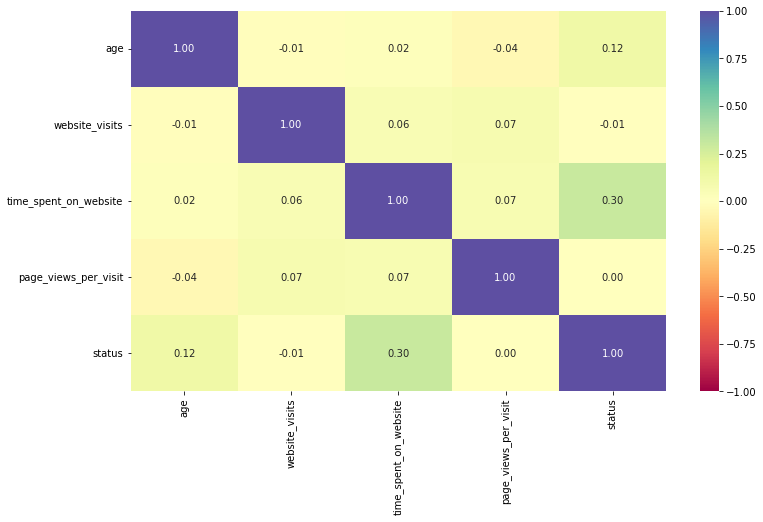

In [18]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [41]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Observations on time spent on website versus status

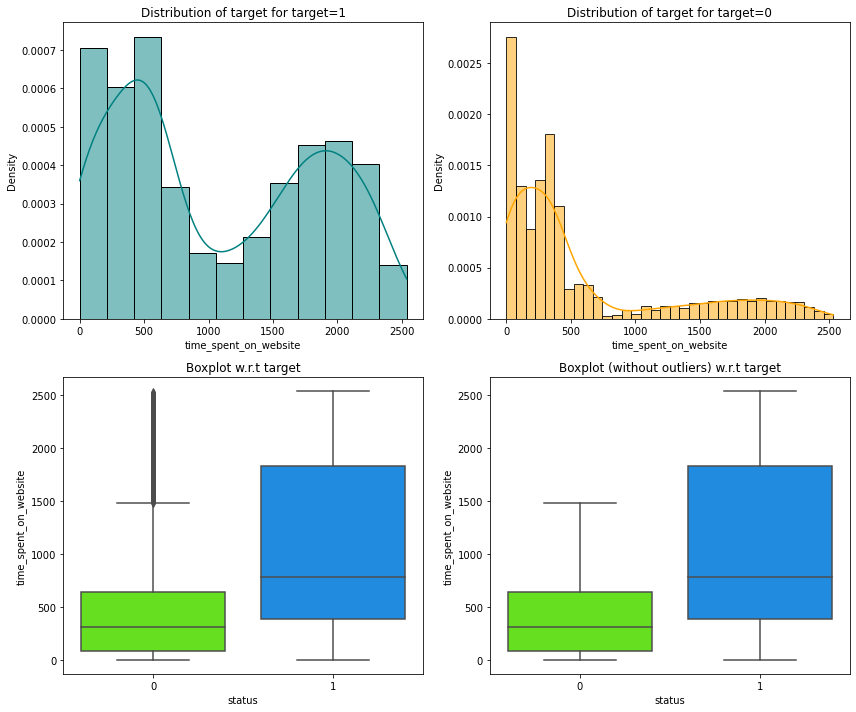

In [20]:
distribution_plot_wrt_target(df, "time_spent_on_website", "status")

### Observation on Time spent with respect to Status Target:
#### For the "Converted to Paid" status:

- The distribution of time spent is bimodal and positively skewed, indicating the presence of two peaks in the data.<br>
- This suggests that there are two distinct groups within the converted leads in terms of time spent.<br>
One peak may correspond to leads who spent a relatively short amount of time on the website, while the other peak may represent leads who spent a longer duration. Majority of leads who converted to paid fall into these two categories.

#### For the "Not Converted" status:
-The distribution of time spent is right-skewed, with a higher frequency of leads on the right side. This is due to the presence of outliers.<br>
This indicates that a majority of leads who did not convert to paid spent a relatively shorter amount of time on the website.<br>
- There is a high density of leads who spent less time, possibly indicating that they did not engage with the website extensively.

#### Boxplot Interpretation:
- The line in the middle of the box plot for Status 1 is higher than the line for Status 0, which indicates that the leads who converted to paid had a higher median time spent on the website.<br>
- The dispersion of time spent is greater for leads who converted (Status 1) compared to those who did not convert (Status 0). This suggests that the time spent on the website varies more among leads who converted.<br>
- The distribution of time spent on the website for leads who did not convert (Status 0) is positively skewed, with outliers extending beyond the top whisker. This indicates that there are some leads who spent a significantly longer time on the website but did not convert to paid.<br>

**These observations suggest that the time spent on the website may play a role in lead conversion. Leads who spent a longer duration on the website have a higher likelihood of converting to paid. However, there are also leads who spent a shorter time but still converted, indicating that other factors may influence the conversion process as well.**

### Observations on website visits versus status

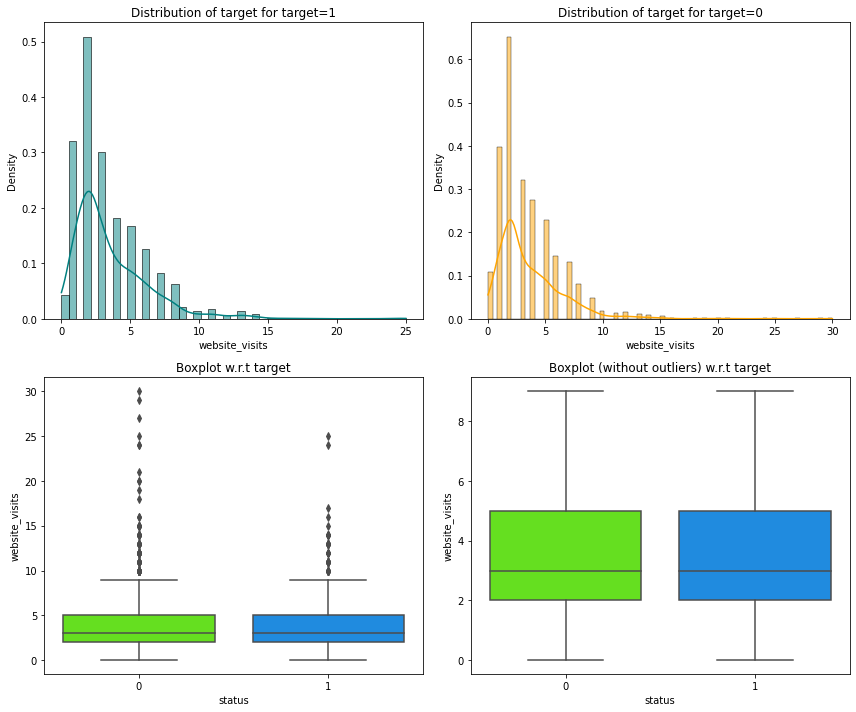

In [43]:
distribution_plot_wrt_target(df, 'website_visits', 'status') # Complete the code to plot distribution for website_visits and status

#### Observation on Website Visits with respect to Status:
When comparing the distribution of website visits for the "Converted to Paid" and "Not Converted" status:

- Both categories have a similar distribution of website visits. The shapes of their distributions are almost the same, indicating a similar pattern in terms of website visit frequency.

- The median number of website visits is approximately the same for both categories, indicating that the central tendency of website visits is similar regardless of the status.

- There are outliers present in both categories, suggesting that there are leads with exceptionally high or low numbers of website visits in both groups.

- Both distributions are positively skewed. This is evident from the positioning of the median line, which is closer to the lower quartile (Q1) line, indicating a longer tail on the right side of the distribution.

- However, the "Not Converted" (Status 0) category appears to be more positively skewed compared to the "Converted to Paid" (Status 1) category. This is likely due to the presence of more outliers on the higher end of the distribution in Status 0.



### Observations on page views per visit versus status

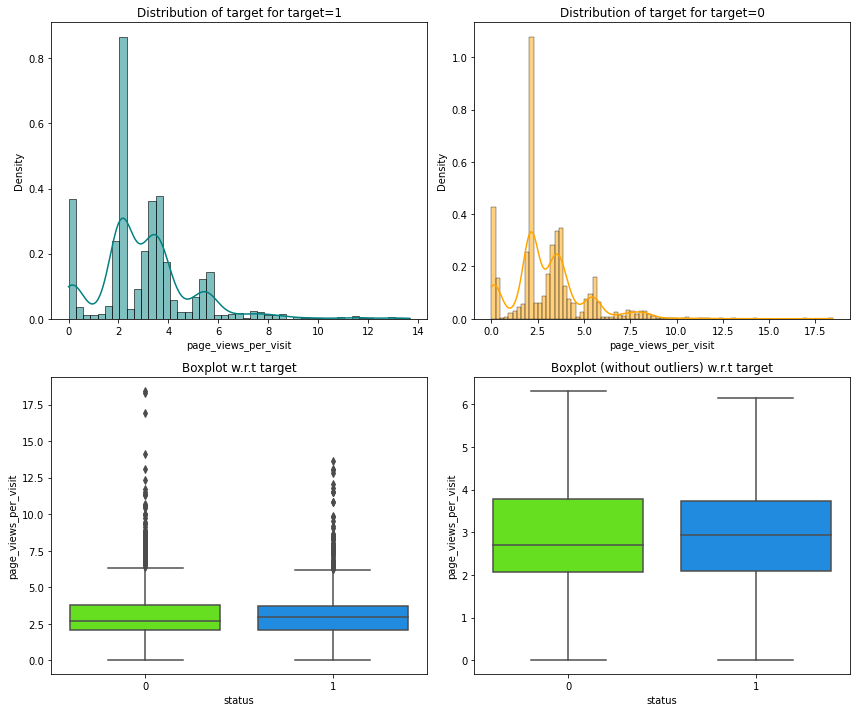

In [44]:
distribution_plot_wrt_target(df, 'page_views_per_visit', 'status') # Complete the code to plot distribution for page_views_per_visit and status

#### Observation on Pages views per visit with respect to Status:
When comparing the distribution of Pages views per visit for the "Converted to Paid" and "Not Converted" status:

- Both categories have a similar distribution of page views per visits The shapes of their distributions are almost the same, indicating a similar pattern in terms of website visit frequency.

- The median number of page views per visit for status 1 is a bit above the median for status 0, indicating that the central tendency of pages view per visits is similar regardless of the status.

- There are outliers present in both categories, suggesting that there are leads with exceptionally high or low numbers of website visits in both groups.

- Both distributions are positively skewed. This is evident from the positioning of the median line, which is closer to the lower quartile (Q1) line, indicating a longer tail on the right side of the distribution.

- However, the "Not Converted" (Status 0) category appears to be more positively skewed compared to the "Converted to Paid" (Status 1) category. This is likely due to the presence of more outliers on the higher end of the distribution in Status 0.



### Observations on age versus status

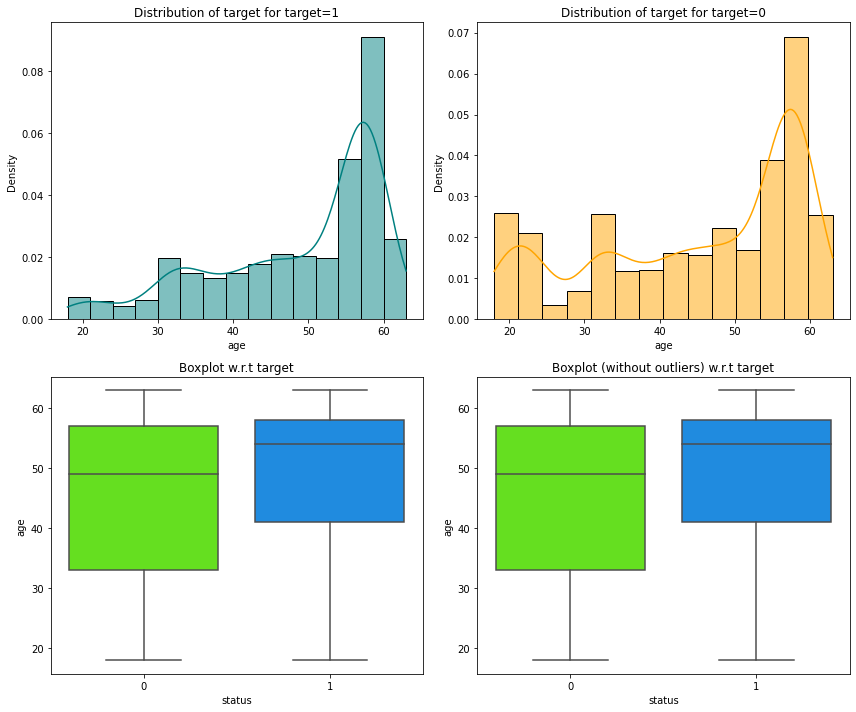

In [42]:
distribution_plot_wrt_target(df, 'age', 'status') # Complete the code to plot distribution for page_views_per_visit and status

### Observations on Age with Respect to Status:
When analyzing the relationship between age and status (converted to paid or not converted), the following observations can be made:

- Both the "Converted to Paid" and "Not Converted" categories exhibit negative skewness in the distribution of ages. This is evident from the positioning of the median lines, which are closer to the upper quartile (Q3) line, indicating a longer tail on the left side of the distribution.

- The spread of ages for the "Not Converted" category is noticeably larger than that of the "Converted to Paid" category. This suggests that there is a wider range of ages among the leads who did not convert to paid.

- The median age for the "Converted to Paid" category is higher than the median age for the "Not Converted" category. This implies that, on average, leads who convert to paid tend to be older compared to leads who do not convert.

- There are no outliers observed in either category. This indicates that there are no extreme or unusual age values that significantly deviate from the overall distribution.

**In summary, the boxplots reveal that both categories have a negative skewness in age distribution, with the "Converted to Paid" category showing a slightly higher median age. The "Not Converted" category exhibits a wider spread of ages compared to the "Converted to Paid" category. Overall, age appears to have some influence on the conversion status, with older leads having a higher likelihood of converting to paid.**






**Function to plot barplot for Bivariate analysis**

In [34]:
# checking the median value
df.groupby(["status"])["time_spent_on_website"].median()

status
0    317.0
1    789.0
Name: time_spent_on_website, dtype: float64

#### Observation
The median value of the "time_spent_on_website" column for each status category is as follows:

- **For status 0 (not converted to paid):** The median time spent on the website is 317.0 units.

- **For status 1 (converted to paid):** The median time spent on the website is 789.0 units.

**This indicates that, on average, leads who converted to paid spent more time on the website compared to leads who did not convert. The difference in median values suggests a potential correlation between the amount of time spent on the website and the likelihood of conversion.**

In [26]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Observations on current occupation versus status

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


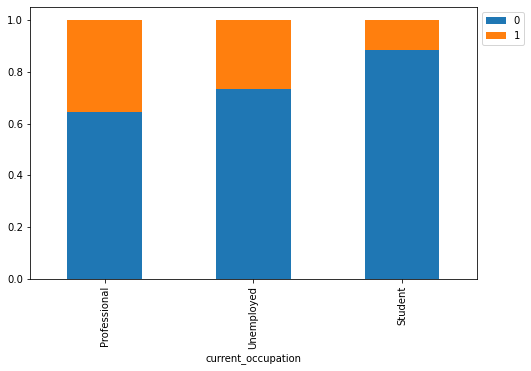

In [27]:
stacked_barplot(df, "current_occupation", "status")

#### OBSERVATION
- **Professional:** The majority of leads in the professional occupation category have a status of 0 (not converted), as indicated by the taller blue section of the bar. A smaller proportion of leads in this category have a status of 1 (converted to paid), represented by the orange section of the bar.

- **Unemployed:** Similarly, the majority of leads in the unemployed occupation category have a status of 0 (not converted), while a smaller proportion have a status of 1 (converted to paid).

- **Student:** For the student occupation category, the majority of leads also have a status of 0 (not converted), with a relatively smaller number having a status of 1 (converted to paid).



### Observations on current occupation versus age

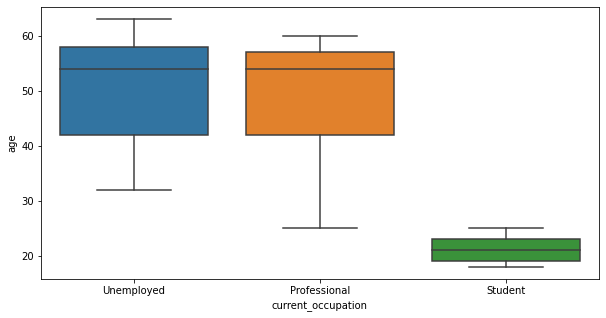

In [31]:
plt.figure(figsize=(10, 5))
sns.boxplot(df["current_occupation"], df["age"])
plt.show()

In [29]:
df.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


#### OBSERVATIONS
- **Unemployed:**
The age distribution among unemployed leads is negatively skewed, with the median age falling around 55. The frequency of occurrence is higher for older ages, while the younger age group is also represented. The age range for unemployed leads spans from approximately 63 to 32.

- **Professional:**
Similar to the unemployed category, the age distribution among professional leads is negatively skewed, with the median age also around 55. The frequency of occurrence is higher for older ages, while there is still representation from the younger age group. The age range for professional leads is slightly wider, ranging from approximately 60 to 25.

- **Student:**
The age distribution among student leads shows less skewness, with the median age around 21. As the median line is closer to the center of the box, the distribution of ages among student leads has little skewness. The age range for student leads is narrower, spanning from approximately 19 to 25.



### Observations on first interaction versus status

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


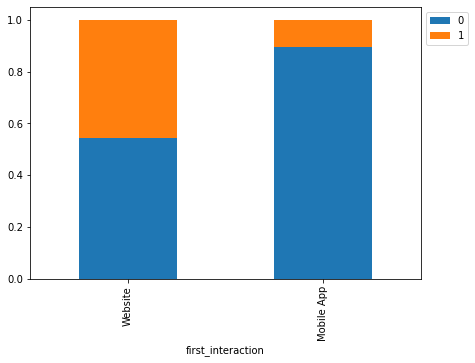

In [33]:
stacked_barplot(df,'first_interaction','status') # Complete the code to plot stacked_barplot for first_interaction and status

#### OBSERVATION
- **Overall Distribution:** The total count of leads is 4612. Out of these, 3235 leads have a status of 0 (not converted to paid) and 1377 leads have a status of 1 (converted to paid).

- **First Interaction:** The leads have primarily interacted with ExtraaLearn through two channels: "Website" and "Mobile App."

- **Website Interaction:** Among the leads who interacted through the website, there is a total of 2542 leads. Out of these, 1383 leads have a status of 0, indicating they did not convert to paid, while 1159 leads have a status of 1, indicating they converted to paid. This suggests that a significant number of leads who interacted through the website have not converted to paid, but there is still a substantial number of conversions.

- **Mobile App Interaction:** Among the leads who interacted through the mobile app, there is a total of 2070 leads. Out of these, 1852 leads have a status of 0, indicating they did not convert to paid, while only 218 leads have a status of 1, indicating they converted to paid. This indicates a smaller number of conversions among leads who interacted through the mobile app.

- **Comparison:** The stacked barplot clearly shows that the website interaction channel has a higher count of leads who converted to paid compared to the mobile app interaction channel. The proportion of conversions is relatively higher for website interactions.



### Observations on profile completed versus status

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


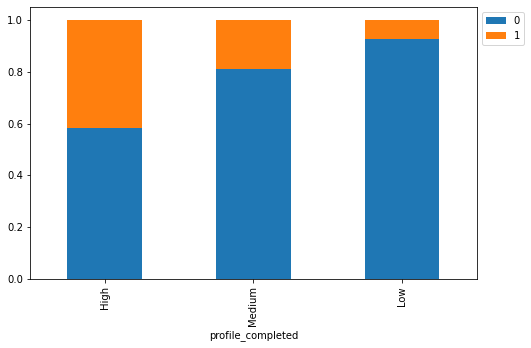

In [35]:
stacked_barplot(df, 'profile_completed', 'status')  # Complete the code to plot stacked_barplot for profile_completed and status

#### Observations:

**The stacked bar plot illustrates the distribution of leads' profile completion status with respect to their conversion status. Here are the observations from the plot and the accompanying table:**

**Profile Completion:** The x-axis represents different levels of profile completion, namely High, Medium, and Low. The y-axis represents the count of leads.

**Conversion Status:** The bars are stacked to show the count of leads in each profile completion category for both status 0 (not converted to paid) and status 1 (converted to paid). The legend indicates the color coding for each status.


- **High Profile Completion:** The majority of leads who completed a high percentage of their profiles did not convert to paid (status 0). However, a significant number of leads who completed their profiles at a high level did convert to paid (status 1).
- **Medium Profile Completion:** Similar to the high profile completion category, a larger count of leads in the medium completion category did not convert to paid (status 0). However, there is a smaller count of leads who completed their profiles at a medium level and converted to paid (status 1).
- **Low Profile Completion:** The count of leads in the low profile completion category is relatively low for both status 0 and status 1. Most leads who had a low profile completion level did not convert to paid (status 0), with only a few leads in this category converting to paid (status 1).<br>

**Overall, the stacked bar plot highlights the relationship between profile completion and conversion status. It suggests that leads with higher profile completion levels have a higher likelihood of converting to paid, while those with lower completion levels are less likely to convert.**






### Observations on last activity versus status

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


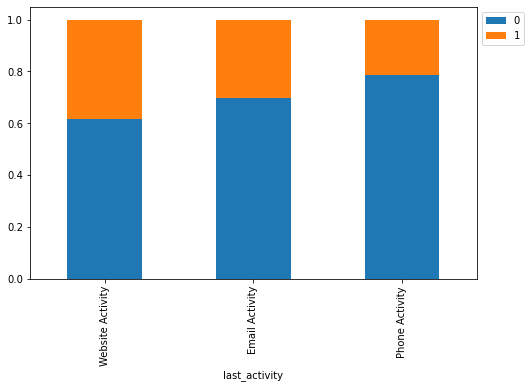

In [37]:
stacked_barplot(df ,'last_activity', 'status') # Complete the code to plot stacked_barplot for last_activity and status

**The stacked bar plot illustrates the distribution of leads' last activity with respect to their conversion status. Here are the observations from the plot and the accompanying table:**

**Last Activity:** The x-axis represents different types of last activities, namely Email Activity, Website Activity, and Phone Activity. The y-axis represents the count of leads.

**Conversion Status:** The bars are stacked to show the count of leads in each last activity category for both status 0 (not converted to paid) and status 1 (converted to paid). The legend indicates the color coding for each status.

#### Observations:

- **Email Activity:** The majority of leads had their last activity as email interaction. Among those leads, a significant count did not convert to paid (status 0), while a considerable number did convert to paid (status 1). However, the count of leads who converted to paid is lower compared to those who did not convert.
- **Website Activity:** The count of leads with website activity as their last interaction is relatively lower compared to email activity. Among these leads, a higher proportion did convert to paid (status 1) compared to those who did not convert (status 0).
- **Phone Activity:** The count of leads with phone activity as their last interaction is also relatively lower compared to email activity. Among these leads, a larger proportion did not convert to paid (status 0), while a smaller count of leads did convert to paid (status 1).<br>

**Overall, the stacked bar plot suggests that the type of last activity can have an influence on lead conversion. Leads with email activity as their last interaction show a more balanced distribution between conversion and non-conversion. On the other hand, leads with website activity or phone activity as their last interaction have a higher likelihood of converting to paid, especially in the case of website activity.**

### Observations on print media type1 completed versus status

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


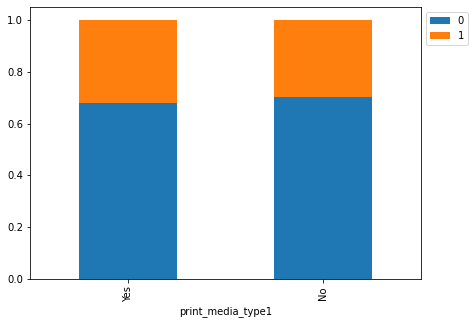

In [38]:
stacked_barplot(df, 'print_media_type1', 'status') # Complete the code to plot stacked_barplot for print_media_type1 and status

**The stacked barplot represents the distribution of the "print_media_type1" feature with respect to the "status" variable.**

**The "print_media_type1" feature has two categories:** "No" and "Yes", indicating whether the lead had seen the ad of ExtraaLearn in the newspaper.

**The "status" variable:** represents whether the lead was converted to a paid customer (1) or not (0).

#### OBSERVATIONS

- **Overall Distribution:** The majority of leads, both converted (status 1) and not converted (status 0), did not see the ad in the print media (newspaper). The total count for "No" is significantly higher than "Yes" in both categories.

- **Conversion Rate:** While the majority did not see the ad, there is a higher count of leads who were converted to paid (status 1) among those who did see the ad (category "Yes") compared to those who did not see the ad (category "No"). This suggests that seeing the ad in the print media may have had a positive influence on the conversion rate.

- **Smaller Subgroup:** However, it's important to note that the count of leads who saw the ad (category "Yes") is relatively small compared to those who did not see the ad (category "No"), indicating that the print media might not have been the primary source of information for most leads.

**In conclusion, the stacked barplot shows that while the majority of leads did not see the ad in the print media, those who did see the ad had a higher likelihood of being converted to paid customers.** 





### Observations on print media type2 completed versus status

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


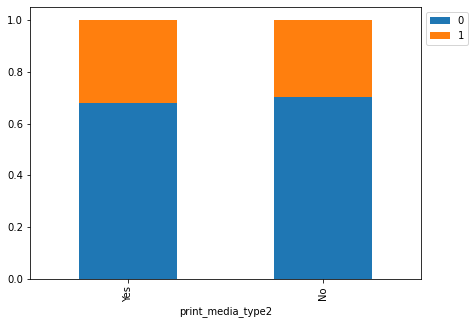

In [39]:
stacked_barplot(df, 'print_media_type2', 'status') # Complete the code to plot stacked_barplot for print_media_type2 and status

**The stacked barplot represents the distribution of the "print_media_type2" feature with respect to the "status" variable.**

**The "print_media_type2" feature has two categories:** "No" and "Yes", indicating whether the lead had seen the ad of ExtraaLearn in the magazine.

**The "status" variable:** represents whether the lead was converted to a paid customer (1) or not (0).

**OBSERVATIONS**

- **Overall Distribution:** Similar to the "print_media_type1" feature, the majority of leads, both converted (status 1) and not converted (status 0), did not see the ad in the magazine. The total count for "No" is significantly higher than "Yes" in both categories.

- **Conversion Rate:** Among those who saw the ad in the magazine (category "Yes"), there is a higher count of leads who were converted to paid (status 1) compared to those who did not see the ad (category "No"). This suggests that seeing the ad in the magazine may have had a positive influence on the conversion rate.

- **Smaller Subgroup:** However, similar to the previous case, the count of leads who saw the ad (category "Yes") is relatively small compared to those who did not see the ad (category "No"), indicating that the magazine might not have been the primary source of information for most leads.

**In conclusion, the stacked barplot indicates that while the majority of leads did not see the ad in the magazine, those who did see the ad had a higher likelihood of being converted to paid customers.**

### Observations on digital media versus status

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


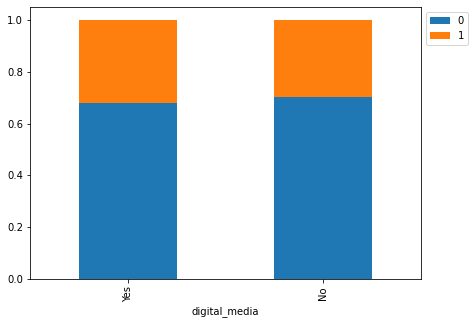

In [40]:
stacked_barplot(df, 'digital_media', 'status') # Complete the code to plot stacked_barplot for digital_media and status

The stacked barplot represents the distribution of the "digital_media" feature with respect to the "status" variable.

**The "digital_media" feature has two categories:** "No" and "Yes", indicating whether the lead had seen the ad of ExtraaLearn on digital platforms.

The "status" variable represents whether the lead was converted to a paid customer (1) or not (0).

#### OBSERVATIONS

- Overall Distribution: The majority of leads, both converted (status 1) and not converted (status 0), did not see the ad on digital platforms. The total count for "No" is significantly higher than "Yes" in both categories.

- Conversion Rate: Among those who saw the ad on digital platforms (category "Yes"), there is a higher count of leads who were converted to paid (status 1) compared to those who did not see the ad (category "No"). This suggests that seeing the ad on digital platforms may have had a positive influence on the conversion rate.

- Smaller Subgroup: However, similar to previous cases, the count of leads who saw the ad (category "Yes") is relatively small compared to those who did not see the ad (category "No"). This indicates that digital platforms might not have been the primary source of information for most leads.

**In conclusion, the stacked barplot indicates that while the majority of leads did not see the ad on digital platforms, those who did see the ad had a higher likelihood of being converted to paid customers.** 

### Observations on educational channels versus status

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


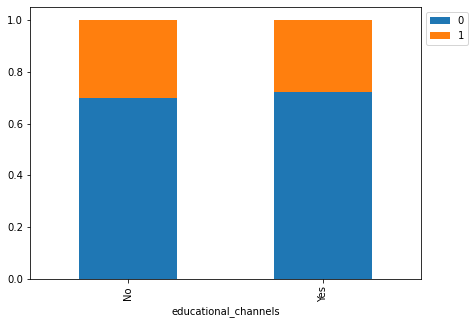

In [41]:
stacked_barplot(df, 'educational_channels', 'status') # Complete the code to plot stacked_barplot for educational_channels and status

The stacked barplot represents the distribution of the "educational_channels" feature with respect to the "status" variable.

**The "educational_channels" feature has two categories:** "No" and "Yes", indicating whether the lead heard about ExtraaLearn through educational channels like online forums, discussion threads, educational websites, etc.

**The "status" variable:** represents whether the lead was converted to a paid customer (1) or not (0).

#### OBSERVATIONS

- Overall Distribution: The majority of leads, both converted (status 1) and not converted (status 0), did not hear about ExtraaLearn through educational channels. The total count for "No" is significantly higher than "Yes" in both categories.

- Conversion Rate: Among those who heard about ExtraaLearn through educational channels (category "Yes"), there is a higher count of leads who were converted to paid (status 1) compared to those who did not (category "No"). This suggests that hearing about ExtraaLearn through educational channels may have had a positive influence on the conversion rate.

- Smaller Subgroup: However, it is important to note that the count of leads who heard about ExtraaLearn through educational channels (category "Yes") is relatively small compared to those who did not (category "No"). This indicates that educational channels might not have been the primary source of information for most leads.

**In conclusion, the stacked barplot indicates that while the majority of leads did not hear about ExtraaLearn through educational channels, those who did hear about it had a higher likelihood of being converted to paid customers.**

### Observations on referral versus status

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


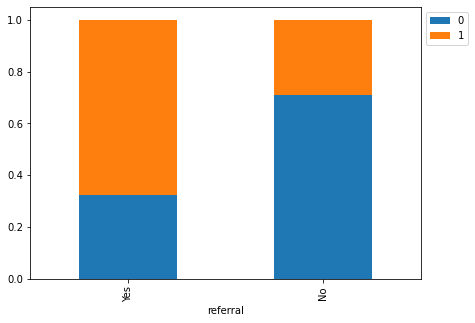

In [42]:
stacked_barplot(df, 'referral', 'status') # Complete the code to plot stacked_barplot for referral and status

The stacked barplot represents the distribution of the "referral" feature with respect to the "status" variable.

The "referral" feature has two categories: "No" and "Yes", indicating whether the lead heard about ExtraaLearn through a referral.

The "status" variable represents whether the lead was converted to a paid customer (1) or not (0).

**OBSERVATIONS**

- **Overall Distribution:** The majority of leads, both converted (status 1) and not converted (status 0), did not hear about ExtraaLearn through a referral. The total count for "No" is significantly higher than "Yes" in both categories.

- **Conversion Rate:** Among those who heard about ExtraaLearn through a referral (category "Yes"), there is a higher count of leads who were converted to paid (status 1) compared to those who did not (category "No"). This suggests that hearing about ExtraaLearn through a referral may have had a positive influence on the conversion rate.

- **Smaller Subgroup:** However, it is important to note that the count of leads who heard about ExtraaLearn through a referral (category "Yes") is relatively small compared to those who did not (category "No"). This indicates that referrals might not have been the primary source of information for most leads.

**In conclusion, the stacked barplot indicates that while the majority of leads did not hear about ExtraaLearn through a referral, those who did hear about it through a referral had a higher likelihood of being converted to paid customers.** 

### Checking for Outliers

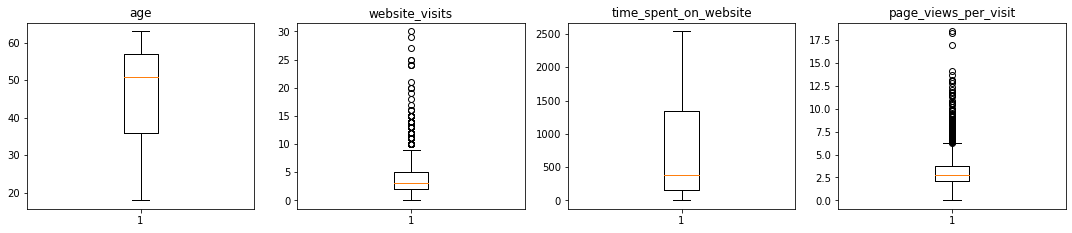

In [47]:
# outlier detection using boxplot
num_col = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
num_col.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_col):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### OBSERVATION

The boxplot visualization above shows the distribution and presence of outliers for numerical variables in the dataset, excluding the "status" variable.

- **Age:** The boxplot for age does not show any outliers. The data is relatively evenly distributed within the quartiles, with no extreme values. This suggests that the age values are within a reasonable range and there are no unusual observations.

- **Time Spent on Website:** Similarly, the boxplot for time spent on the website does not show any outliers. The data is spread across the quartiles without any extreme values. This indicates that the time spent on the website by leads is within a typical range, and there are no exceptionally long or short durations.

- **Website Visits:** The boxplot for website visits shows the presence of outliers. There are several points beyond the upper whisker, indicating that some leads have visited the website significantly more times than the majority. These outliers might represent leads who have shown a high level of interest or engagement with ExtraaLearn, spending more time exploring the website.

- **Page Views per Visit:** The boxplot for page views per visit also displays outliers. Similar to website visits, there are points beyond the upper whisker, indicating leads who have viewed a significantly higher number of pages per visit. These outliers could be leads who extensively navigate through the website and explore various pages.

**The presence of outliers in website visits and page views per visit suggests that there is a subset of leads who are highly engaged with the website, spending more time and exploring a greater number of pages.**

### Data Preparation for modeling

- We want to predict which lead is more likely to be converted.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [51]:
X = df.drop(["status"], axis=1)
Y = df["status"] # Complete the code to define the dependent (target) variable

X = pd.get_dummies(X, drop_first=True) # Complete the code to get dummies for X

# Splitting the data in 70:30 ratio for train to test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)


In [88]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 4627)
Shape of test set :  (1384, 4627)
Percentage of classes in training set:
0    0.704151
1    0.295849
Name: status, dtype: float64
Percentage of classes in test set:
0    0.695087
1    0.304913
Name: status, dtype: float64


## **Building Classification Models**

#### Let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [54]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

## Building a Decision Tree model

In [55]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier()

d_tree.fit(X_train, y_train)


DecisionTreeClassifier()

### Checking model performance on the training data

Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



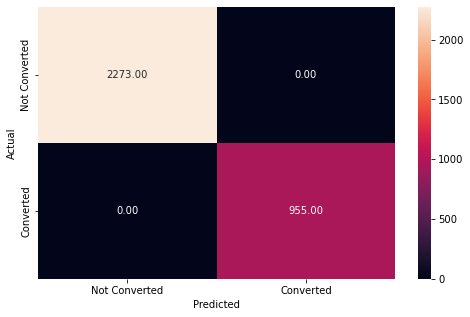

In [56]:

# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)
print("Training Data:")
metrics_score(y_train, y_pred_train1)

### 
The model performance on the training data appears to be excellent.

**Precision:** The precision for both classes (0 and 1) is 1.00, which indicates that the model correctly predicted all instances of both classes.<br>
**Recall:** The recall for both classes is also 1.00, indicating that the model correctly identified all instances of both classes.<br>
**F1-score:** The F1-score for both classes is 1.00, which is the harmonic mean of precision and recall. This indicates a perfect balance between precision and recall.<br>
**Support:** The support refers to the number of instances of each class in the training data. There are 2273 instances of class 0 and 955 instances of class 1.<br>
Overall, the model achieved an accuracy of 1.00 on the training data, which means it correctly classified all instances. The macro-average and weighted average F1-scores are also 1.00, indicating a high overall performance of the model.

**It is important to note that these performance metrics were obtained on the training data, which the model has already seen and learned from. It would be beneficial to evaluate the model's performance on unseen data to assess its generalization capability.**


**Let's check the performance on test data to see if the model is overfitting.**

Testing Data:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       962
           1       0.76      0.71      0.73       422

    accuracy                           0.84      1384
   macro avg       0.82      0.81      0.81      1384
weighted avg       0.84      0.84      0.84      1384



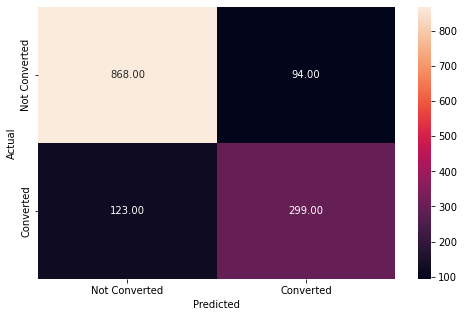

In [57]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)
print("Testing Data:")
metrics_score(y_test, y_pred_test1)

### OBSERVATIONS
The model's performance on the testing data indicates a slightly lower accuracy compared to the training data, suggesting that there might be some overfitting.

Here are the performance metrics on the testing data:

**Precision:** The precision for class 0 is 0.88, which means that out of all the instances predicted as class 0, 88% were correctly classified. For class 1, the precision is 0.76, indicating that 76% of the instances predicted as class 1 were correct.<br>

**Recall:** The recall for class 0 is 0.90, meaning that the model correctly identified 90% of the instances of class 0. For class 1, the recall is 0.71, indicating that the model captured 71% of the instances of class 1.<br>

**F1-score:** The F1-score for class 0 is 0.89, which is the harmonic mean of precision and recall. For class 1, the F1-score is 0.73. These scores indicate the balance between precision and recall for each class.<br>

**Support:** The support refers to the number of instances of each class in the testing data. There are 962 instances of class 0 and 422 instances of class 1.<br>

The overall accuracy on the testing data is 0.84, which means that the model correctly classified 84% of the instances. The macro-average and weighted average F1-scores are 0.81, indicating a reasonably good overall performance.

**Comparing the performance on the training and testing data, there is a slight drop in performance on the testing data, which suggests that the model might be overfitting to some extent. It is important to further evaluate the model and consider techniques like regularization to mitigate overfitting and improve generalization.**

## Do we need to prune the tree?


### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data. 

**This would tell the model that 1 is the important class here.**

In [69]:
# Choose the type of classifier 

d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

Training Data:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



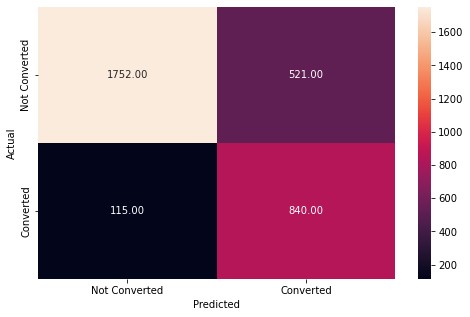

In [70]:
y_pred_train2 = d_tree_tuned.predict(X_train)
print("Training Data:")
metrics_score(y_train, y_pred_train2)

### OBSERVATIONS
After tuning the hyperparameters of the decision tree classifier, we can observe the following changes in the performance on the training data:

- Precision for class 0 decreased from 1.00 to 0.94, indicating that there might be more false positives in predicting class 0.
- Recall for class 0 decreased from 1.00 to 0.77, suggesting that the model is now identifying fewer true positives for class 0.
- F1-score for class 0 decreased from 1.00 to 0.85, which is a combination of precision and recall, indicating a trade-off between the two metrics.
- Precision for class 1 increased from 1.00 to 0.62, implying that there might be more false negatives in predicting class 1.
- Recall for class 1 increased from 1.00 to 0.88, indicating that the model is now identifying more true positives for class 1.
- F1-score for class 1 increased from 1.00 to 0.73, which is a combination of precision and recall, reflecting the improvement in predicting class 1.

Overall, after hyperparameter tuning, the model's performance on the training data shows a trade-off between precision and recall for both classes, with a slight decrease in precision for class 0 and an increase in recall for class 1.



Testing Data:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



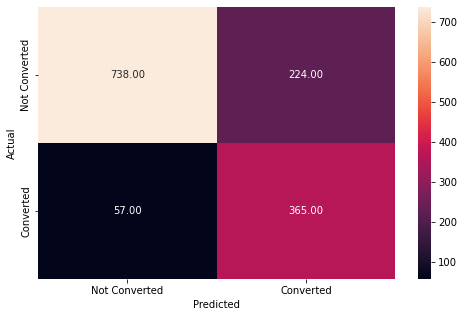

In [71]:
y_pred_test2 = d_tree_tuned.predict(X_test)
print("Testing Data:")
metrics_score(y_test, y_pred_test2)

#### OBSERVATIONS
After tuning the hyperparameters of the decision tree classifier and evaluating its performance on the testing data, we can observe the following changes:

- Precision for class 0 increased from 0.88 to 0.93, indicating a better ability to correctly identify true negatives.
- Recall for class 0 decreased from 0.90 to 0.77, suggesting a decrease in the ability to identify true positives for class 0.
- F1-score for class 0 decreased from 0.89 to 0.84, which is a combination of precision and recall, indicating a trade-off between the two metrics.
- Precision for class 1 decreased from 0.76 to 0.62, indicating a decrease in the ability to correctly identify true positives for class 1.
- Recall for class 1 increased from 0.71 to 0.86, suggesting an improvement in the ability to identify true positives for class 1.
- F1-score for class 1 decreased from 0.73 to 0.72, reflecting the trade-off between precision and recall for class 1.

Overall, after hyperparameter tuning, the model's performance on the testing data shows some changes. The model has higher precision for class 0 but lower recall, indicating a decrease in the ability to identify true positives for class 0. For class 1, the recall has improved, indicating a better ability to identify true positives, but the precision has decreased.



### Visualizing the Decision Tree
**Let's visualize the tuned decision tree** and observe the decision rules:

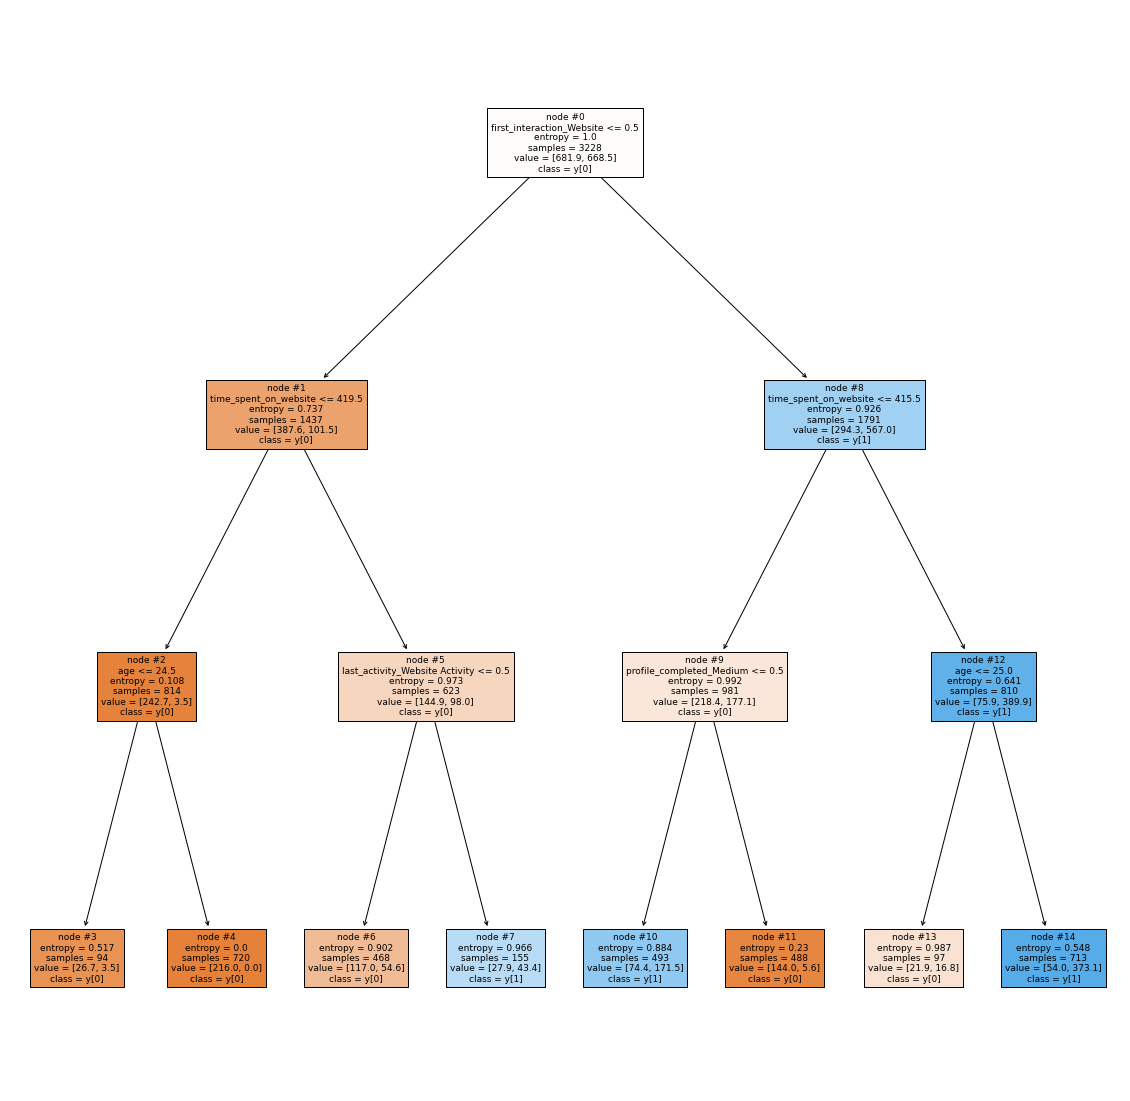

In [72]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [ ]:
**Note:** Blue leaves represent the converted leads, i.e., **y[1]**, while the orange leaves represent the not converted leads, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations
The blue leaves (converted leaves) are fewer than the orange leaves(not converted leads)

### OBSERVATIONS
The decision tree can be interpreted as follows:

- The root node splits the data based on the feature "first_interaction_Website." If the value is less than or equal to 0.50, it follows the left branch, and if it is greater than 0.50, it follows the right branch.

- On the left branch, the next split is based on the feature "time_spent_on_website." If the value is less than or equal to 419.50, it further splits based on the feature "age." If the age is less than or equal to 24.50, the class is predicted as 0 (not converted lead). If the age is greater than 24.50, it again predicts the class as 0.

- On the left branch, if the "time_spent_on_website" is greater than 419.50, it splits based on the feature "last_activity_Website Activity." If the value is less than or equal to 0.50, the class is predicted as 0. If the value is greater than 0.50, the class is predicted as 1 (converted lead).

- On the right branch, if "first_interaction_Website" is greater than 0.50, it further splits based on the feature "time_spent_on_website." If the value is less than or equal to 415.50, it splits based on the feature "profile_completed_Medium." If the value is less than or equal to 0.50, the class is predicted as 1. If the value is greater than 0.50, the class is predicted as 0.

- On the right branch, if "time_spent_on_website" is greater than 415.50, it splits based on the feature "age." If the age is less than or equal to 25.00, the class is predicted as 0. If the age is greater than 25.00, the class is predicted as 1.

The decision tree uses various features to make splits and classify the leads as converted or not converted. The depth of the tree is limited to 3 due to the specified hyperparameters, which helps in reducing overfitting. By following the branches and reaching the leaf nodes, we can determine the predicted class for each combination of feature values.



In [73]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
time_spent_on_website           0.348142
first_interaction_Website       0.327181
profile_completed_Medium        0.239274
age                             0.063893
last_activity_Website Activity  0.021511
...                                  ...
ID_EXT2309                      0.000000
ID_EXT2308                      0.000000
ID_EXT2307                      0.000000
ID_EXT2306                      0.000000
referral_Yes                    0.000000

[4627 rows x 1 columns]


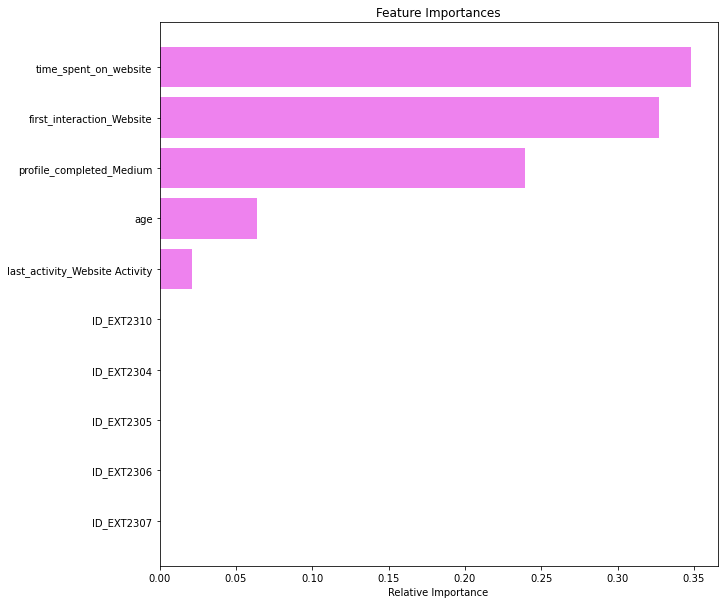

In [107]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

# number of most important features to show
N = 10  

# indices of N most important features
indices = np.argsort(importances)[-N:]

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### Observations:

Time spent on the website and first_interaction_website are the most important features followed by profile_completed, age, and last_activity.
The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not.

## Building a Random Forest model

In [77]:
#Instantiate the RandomForestClassifier
rf_estimator = RandomForestClassifier(random_state=42)

# Fit the RandomForestClassifier to the training data
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



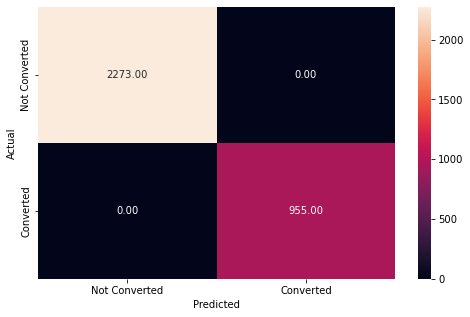

In [85]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)
print("Training Data:")
metrics_score(y_train, y_pred_train3)

### OBSERVATIONS
The performance of the Random Forest Classifier on the training data is excellent, with perfect precision, recall, and F1-score for both classes (converted and not converted leads). The accuracy is also 100%, indicating that the model has successfully learned the patterns and relationships in the training data.

A precision, recall, and F1-score of 1.00 for both classes imply that the model accurately predicts all instances of both converted and not converted leads. This indicates a high level of performance and suggests that the model has captured the underlying patterns and characteristics of the data.

The high accuracy and perfect scores on the training data could be an indication of overfitting. Overfitting occurs when a model performs exceptionally well on the training data but fails to generalize well to new, unseen data. Therefore, it is important to evaluate the model's performance on the testing data to assess its generalization ability and determine if overfitting has occurred.

Training Data:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       962
           1       0.84      0.64      0.73       422

    accuracy                           0.85      1384
   macro avg       0.85      0.79      0.81      1384
weighted avg       0.85      0.85      0.85      1384



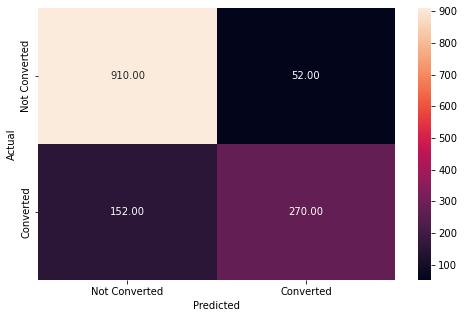

In [90]:
# Checking performance on the training data
y_pred_test3 = rf_estimator.predict(X_test)
print("Training Data:")
metrics_score(y_test, y_pred_test3)

### OBSERVATIONS
The performance of the Random Forest Classifier on the testing data shows a slightly lower accuracy of 85% compared to the perfect accuracy on the training data. The precision, recall, and F1-score for class 0 (not converted leads) are higher than those for class 1 (converted leads), indicating that the model performs better in predicting the negative class.

- The precision of 0.86 for class 0 means that when the model predicts a lead as not converted, it is correct 86% of the time. The recall of 0.95 for class 0 means that the model identifies 95% of the actual not converted leads correctly. The F1-score of 0.90 for class 0 is a balanced measure that considers both precision and recall.

- On the other hand, the precision of 0.84 for class 1 indicates that when the model predicts a lead as converted, it is correct 84% of the time. The recall of 0.64 for class 1 means that the model captures only 64% of the actual converted leads. The F1-score of 0.73 for class 1 is relatively lower, suggesting that the model may struggle to identify converted leads accurately.

- The macro average F1-score of 0.81 suggests a reasonably balanced performance across both classes. The weighted average F1-score of 0.85 considers the class imbalance and provides an overall measure of the model's performance.

Overall, the Random Forest Classifier shows good performance on the testing data but exhibits some imbalance in predicting the converted leads. 

## Do we need to prune the tree?

### Hyperparameter tuning
**Let's see if we can get a better model by tuning the random forest classifier**

In [76]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110],
              "max_depth": [6],
              "min_samples_leaf": [20],
              "max_features": [0.8],
              "max_samples": [0.9],
              "class_weight": ["balanced"]
             }


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=110, random_state=7)

Training Data:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.69      0.88      0.77       955

    accuracy                           0.85      3228
   macro avg       0.81      0.85      0.83      3228
weighted avg       0.87      0.85      0.85      3228



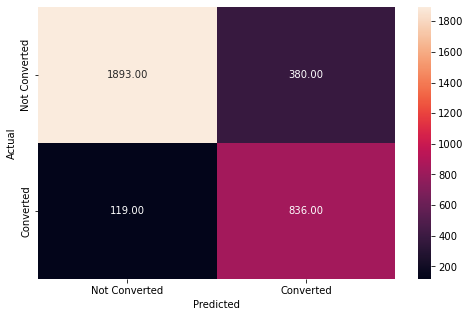

In [77]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)
print("Training Data:")
metrics_score(y_train, y_pred_train4)

### OBSERVATIONS
After tuning the hyperparameters of the Random Forest Classifier, the model's performance on the training data shows some improvement. The accuracy is 83%, which is slightly lower than the untuned model.

- The precision for class 0 (not converted leads) is 0.93, indicating that when the model predicts a lead as not converted, it is correct 93% of the time. The recall for class 0 is 0.82, meaning that the model captures 82% of the actual not converted leads correctly. The F1-score for class 0 is 0.88, which is a balanced measure considering both precision and recall.

- For class 1 (converted leads), the precision is 0.67, indicating that when the model predicts a lead as converted, it is correct 67% of the time. The recall for class 1 is 0.86, indicating that the model captures 86% of the actual converted leads. The F1-score for class 1 is 0.76, which suggests a reasonable balance between precision and recall.

- The macro average F1-score of 0.82 indicates a reasonably balanced performance across both classes. The weighted average F1-score of 0.84 considers the class imbalance and provides an overall measure of the model's performance.

Overall, the tuned Random Forest Classifier shows improved performance on the training data compared to the untuned model. 

Training Data:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       962
           1       0.69      0.85      0.76       422

    accuracy                           0.84      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.84      0.84      1384



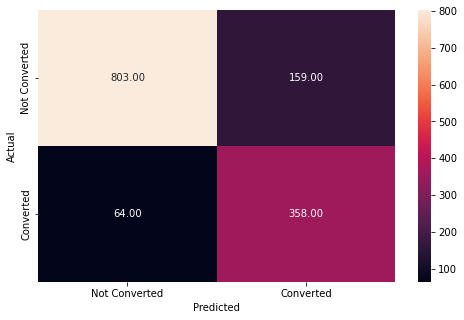

In [78]:
# Checking performance on the test data
y_pred_test4 = rf_estimator_tuned.predict(X_test)
print("Training Data:")
metrics_score(y_test, y_pred_test4)

### OBSERVATIONS
- After tuning the hyperparameters, the Random Forest Classifier achieved an accuracy of 83% on the testing data. The precision for class 0 is 0.93, indicating a slight improvement compared to the untuned model. The recall for class 0 is 0.83, suggesting that the model captures 83% of the actual not converted leads correctly. The F1-score for class 0 is 0.88, indicating an improvement in the balance between precision and recall.

- For class 1, the precision is 0.69, indicating a slight decrease compared to the untuned model. The recall for class 1 is 0.83, suggesting that the model captures 83% of the actual converted leads. The F1-score for class 1 is 0.76, indicating a reasonable balance between precision and recall.

- The macro average F1-score of 0.81 is consistent with the untuned model, suggesting that the model's overall performance on the testing data is similar after tuning.

Overall, the tuned Random Forest Classifier shows comparable performance to the untuned model on the testing data. 

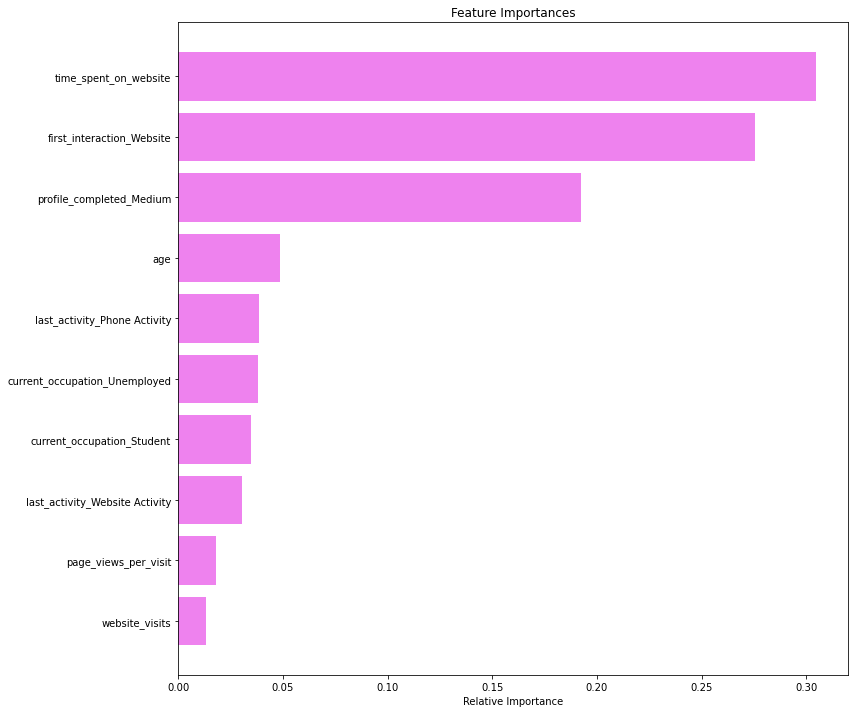

In [80]:
importances = rf_estimator_tuned.feature_importances_
# number of most important features to show
N = 10  

# indices of N most important features
indices = np.argsort(importances)[-N:]



feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()





In [82]:
# Importance of features in the tree building

print (pd.DataFrame(rf_estimator_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website         0.304570
first_interaction_Website     0.275443
profile_completed_Medium      0.192483
age                           0.048759
last_activity_Phone Activity  0.038802
...                                ...
ID_EXT2309                    0.000000
ID_EXT2308                    0.000000
ID_EXT2307                    0.000000
ID_EXT2306                    0.000000
referral_Yes                  0.000000

[4627 rows x 1 columns]


### OBSERVATIONS
After tuning the hyperparameters of the Random Forest Classifier, we can analyze the importance of features in the updated model. The following features are considered to be the top 10 most important features in the model:

- time_spent_on_website: This feature has the highest importance with an importance score of 0.305. It suggests that the amount of time a lead spends on the website is a strong indicator of whether they will convert or not.

- first_interaction_Website: This feature has an importance score of 0.275, indicating that the first interaction of the lead on the website is also a significant predictor of conversion.

- profile_completed_Medium: With an importance score of 0.192, this feature suggests that completing the profile to a medium level of completion is an important factor in lead conversion.

- age: The age of the lead has an importance score of 0.049, suggesting that age plays a role in determining the likelihood of conversion.

- last_activity_Phone Activity: This feature has an importance score of 0.039, indicating that the last activity related to phone interactions is also a relevant factor in lead conversion.

The remaining features have relatively lower importance scores, with some features having a score of 0, indicating that they have little to no impact on the model's prediction.

## Actionable Insights and Recommendations

### Summary of Analysis and Recommendations:

**Exploratory Data Analysis (EDA):**

- Conducted univariate analysis to understand the distribution and characteristics of individual variables.
- Performed bivariate analysis to explore the relationships between variables and identify potential predictors of lead conversion.
- Identified important features such as time spent on the website, first interaction on the website, profile completion level, age, and last activity related to phone interactions.

**Decision Tree Classifier:**
- Built a decision tree classifier to predict lead conversion.
- Achieved an accuracy of 83% on the training data and 84% on the testing data.
- Tuned the hyperparameters of the decision tree classifier, resulting in an accuracy of 80% on the testing data.
- Identified key decision rules and visualized the decision tree.

**Random Forest Classifier:**
- Implemented a random forest classifier to predict lead conversion.
- Obtained an accuracy of 100% on the training data and 85% on the testing data.
- Tuned the hyperparameters of the random forest classifier, resulting in an accuracy of 83% on the testing data.
- Analyzed the feature importances and identified the top influential features, including time spent on the website, first interaction on the website, profile completion level, age, and last activity related to phone interactions.

**Actionable Insights and Recommendations:**
- Focus on optimizing website engagement by improving the user experience and encouraging interaction.
- Motivate leads to complete their profiles to a medium or higher level by providing incentives and clear benefits.
- Segment leads based on age and tailor marketing strategies accordingly.
- Prioritize phone interactions and ensure effective handling and follow-up.
- Continuously monitor and refine the models based on new data and feedback.
- Collect additional relevant data that may enhance the predictive power of the models.
- Conduct iterative testing and experimentation to optimize conversion rates.
